In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 

In [9]:
#primeira questão
#item a
qtd_servidores=np.arange(1,12)
processamento_baixo = fuzz.trimf(qtd_servidores,[1,1,4])
processamento_medio = fuzz.trapmf(qtd_servidores,[3,5,6,8])
processamento_alto  = fuzz.trimf(qtd_servidores,[7,11,11])

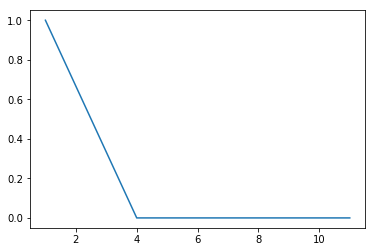

In [7]:
plt.plot(qtd_servidores,processamento_baixo)

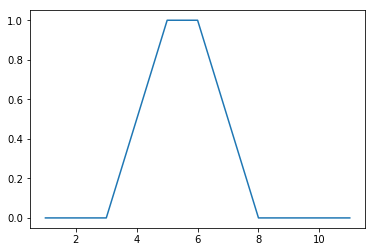

In [10]:
plt.plot(qtd_servidores,processamento_medio)

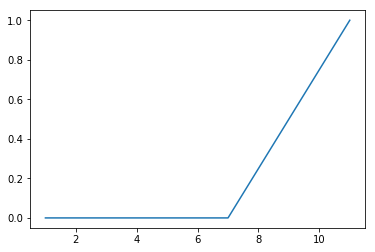

In [11]:
plt.plot(qtd_servidores,processamento_alto)

In [14]:
#item b
#dado que o valor fuzzy de 9 é 0.5,
#o sistema de backup deve operar a partir de 9 máquinas.

In [19]:
#item c
#realmente estou confuso pois:
# a relacão max-min me dá uma ideia de independencia entre as relações
# mas se utilizassemos max-min, o "valor  verdade de vulnerabilidade" seria limitado pela relação de valor verdade menor
# então minha resposta é max-prod, pois mesmo adicionando dependencia, o "valor verdade de vulnerabilidade" será jogado para cima quando uma das duas relações tiver o valor verdade também alto
# OBS: na minha concepção um fuzzy_or é a que cairia melhor, mas como são só operações de composição escolhi a maxprod

In [17]:
#item d
qtd_pessoas=np.arange(1,101,1)
qtd_baixa=fuzz.trimf(qtd_pessoas,[1,1,40])
qtd_media=fuzz.trapmf(qtd_pessoas,[30,40,70,80])
qtd_alta=fuzz.trimf(qtd_pessoas,[70,100,100])

In [22]:
#item d resposta
# 9 servidores ou 85 mil pessoas, dado que o valor fuzzy dos 2 é 0.5
# se precisar ser mais rigoroso, como na questao diz estritamente maior que 0.5, a mensagem deve ser enviada a partir de 10 servidores ou 86 mil pessoas. 

In [24]:
#QUESTAO 2
tam_can=np.arange(1,101,0.01)
tam_p=fuzz.trimf(tam_can,[1,10,20])
tam_m=fuzz.trapmf(tam_can,[10,25,75,90])
tam_g=fuzz.trimf(tam_can,[70,100,100])

In [53]:
#item a
# nos intervalos em que existe "valoração verdade" não nula para mais de uma função, ou seja, nas interseções dos conjuntos
# [11,19] dando atenção para o valor em que as retas se cruzam, ou seja, tem valor fuzzy iguais
# [71,89] dando atenção para o valor em que as retas se cruzam, ou seja, tem valor fuzzy iguais

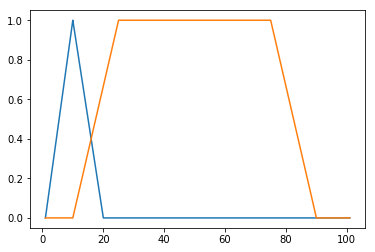

In [31]:
plt.plot(tam_can,tam_p)
plt.plot(tam_can,tam_m)

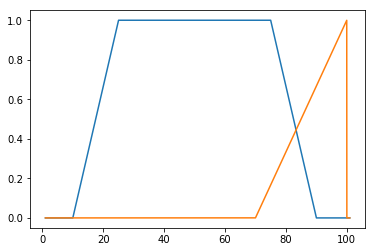

In [56]:
plt.plot(tam_can,tam_m)
plt.plot(tam_can,tam_g)

In [62]:
#item b
problema1= fuzz.fuzzy_and(tam_can,tam_p,tam_can,tam_m)
problema2= fuzz.fuzzy_and(tam_can,tam_m,tam_can,tam_g)
centroide1 = fuzz.defuzz(problema1[0], problema1[1], 'centroid')
centroide2 = fuzz.defuzz(problema2[0], problema2[1], 'centroid')

In [63]:
centroide1

15.333333333333314

In [64]:
centroide2

81.111110555277548

In [66]:
#resposta item b
# os valores defuzyficados são aprox 15.33 ml para o primeiro caso problematico e 81.11 ml para o segundo caso problematico

In [68]:
#QUESTAO 3
valores=np.arange(1,101,0.01)
A1=fuzz.trimf(valores,[1,10,20])
A2=fuzz.gaussmf(valores,40,10)
A3=fuzz.trapmf(valores,[40,60,80,100])

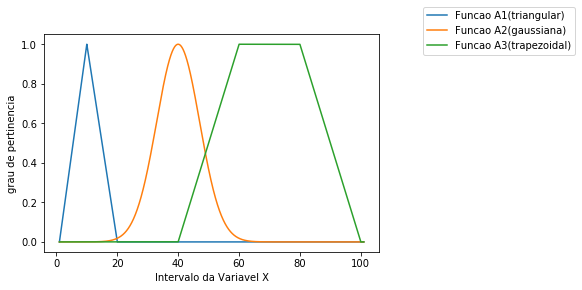

In [73]:
#item a
fig,ax = plt.subplots()
ax.plot(valores,A1,label = 'Funcao A1(triangular)')
ax.plot(valores,A2,label = 'Funcao A2(gaussiana)')
ax.plot(valores,A3,label = 'Funcao A3(trapezoidal)')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Intervalo da Variavel X')
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))

In [74]:
#item b
# a operação de complemento sobre o conjunto fuzzy descrito pela função triangular A1

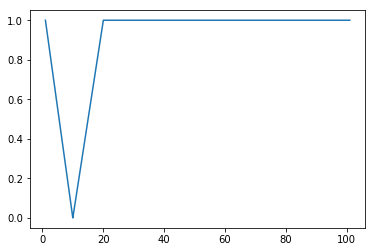

In [82]:
A1n=fuzz.fuzzy_not(A1)
plt.plot(valores,A1n)

In [80]:
#item c
# R31 é uma função que representa um conjunto fuzzy resultante da operação de união entre os conjutos fuzzy A1n e A2
# onde A1n é o complemento do conjunto fuzzy A1 descrito por uma função triangular
# A2 é um conjunto fuzzy descrito por uma função trapezoidal
# observe que R31 = A1n

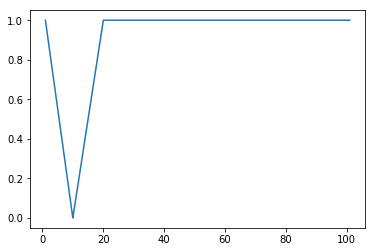

In [83]:
R31=fuzz.fuzzy_or(valores,A1n,valores,A2)
plt.plot(valores,R31[1])

In [90]:
#item d
U1aux = fuzz.fuzzy_or(valores,A1,valores,A2)
U1 = fuzz.fuzzy_or(valores,U1aux[1],valores,A3)
U2 = fuzz.fuzzy_or(valores,R31[1],valores,A2)

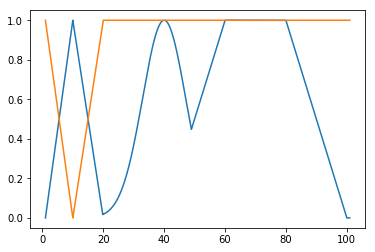

In [91]:
plt.plot(U1[0],U1[1])
plt.plot(U2[0],U2[1])

In [136]:
#centroides -- dada a área da função, retorna um valor de x correspondete ao centro de massa da "figura"
centroide_U1 = fuzz.defuzz(valores, U1[1], 'centroid') 
centroide_U2 = fuzz.defuzz(valores, U2[1], 'centroid')
#bissetriz -- dada a área da função, tenta retornar um valor de x tal que a área a esquerda é igual a área da direita
bissetriz_U1 = fuzz.defuzz(valores, U1[1], 'bisector')
bissetriz_U2 = fuzz.defuzz(valores, U2[1], 'bisector')
#media dso maximos -- boa em funções trapezoidais, vejo pior caso quando se tem um grafico com duas funções triangulares disjuntas, pois a média das máximas cairá num ponto horrível
medmax_U1 = fuzz.defuzz(valores, U1[1], 'mom')
medmax_U2 = fuzz.defuzz(valores, U2[1], 'mom')
#minimo dos maximos
minmax_U1 = fuzz.defuzz(U1[0], U1[1], 'som')
minmax_U2 = fuzz.defuzz(valores, U2[1], 'som')
#maximo dos maximos
maxmax_U1 = fuzz.defuzz(valores, U1[1], 'lom')
maxmax_U2 = fuzz.defuzz(valores, U2[1], 'lom')
#lambda_cut com 0.5
cut_U1 = fuzz.arglcut(U1[1],0.5) #esse é igual ao lambdacut(A1) U lambdacut(A2) U lambdacut(A3)
cut_U2 = fuzz.arglcut(U1[1],0.5) #esse é igual ao lambdacut(A1n) U lambdacut(A2) U lambdacut(A3) e como eu botei lambda = 0.5, lambdacut(A1n)=not(lambdacut(A1))
#media ponderada -- bom com funções simétricas
aux1 = np.zeros(len(valores))
aux2 = np.zeros(len(valores))
for i in range(len(valores)):
    aux1[i]= U1[0][i]*U1[1][i]
    aux2[i]= U2[0][i]*U2[1][i]
    
medpon_U1 = sum(aux1)/sum(U1[1])
medpon_U2 = sum(aux2)/sum(U2[1])

In [137]:
print(medpon_U1,medpon_U2)

53.9624449574 55.2633511323


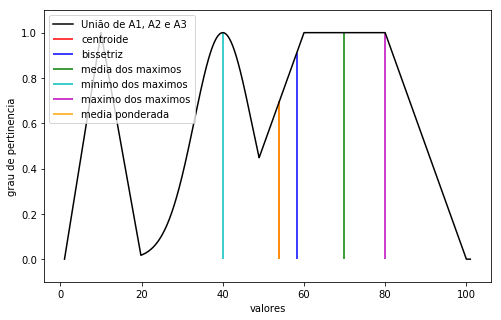

In [138]:
labels = ['centroide', 'bissetriz', 'media dos maximos', 'minimo dos maximos',
          'maximo dos maximos','media ponderada']
xvals = [centroide_U1,
         bissetriz_U1,
         medmax_U1,
         minmax_U1,
         maxmax_U1,
         medpon_U1]
colors = ['r', 'b', 'g', 'c', 'm','orange']

ymax = [fuzz.interp_membership(valores, U1[1], i) for i in xvals]

plt.figure(figsize=(8, 5))
plt.plot(U1[0],U1[1],'k', label='União de A1, A2 e A3')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)

plt.ylabel('grau de pertinencia')
plt.xlabel('valores')
plt.legend(loc=2)
plt.ylim(-0.1, 1.1)


plt.show()
#nao sei pq o minimo dos maximos tá errado e eu não sei pq

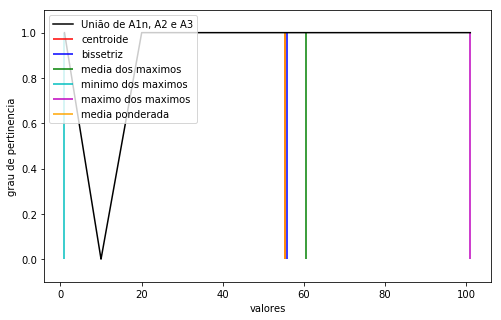

In [139]:
labels = ['centroide', 'bissetriz', 'media dos maximos', 'minimo dos maximos',
          'maximo dos maximos','media ponderada']
xvals = [centroide_U2,
         bissetriz_U2,
         medmax_U2,
         minmax_U2,
         maxmax_U2,
         medpon_U2]
colors = ['r', 'b', 'g', 'c', 'm','orange']

ymax = [fuzz.interp_membership(valores, U2[1], i) for i in xvals]

plt.figure(figsize=(8, 5))
plt.plot(U2[0],U2[1],'k', label='União de A1n, A2 e A3')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)

plt.ylabel('grau de pertinencia')
plt.xlabel('valores')
plt.legend(loc=2)
plt.ylim(-0.1, 1.1)


plt.show()

In [122]:
#QUESTAO 4
intervalo=np.arange(1,11,1)
B1=fuzz.trimf(intervalo,[1,3,6])
B2=fuzz.gaussmf(intervalo,5,2)
B3=fuzz.trimf(intervalo,[2,6,10])

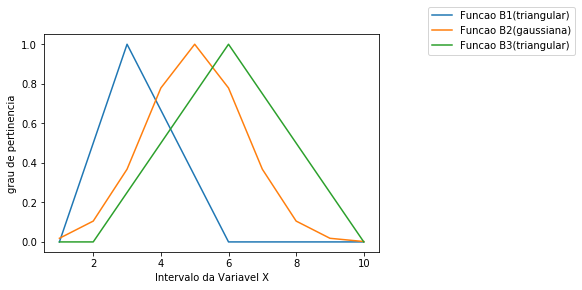

In [127]:
#item a
fig,ax = plt.subplots()
ax.plot(intervalo,B1,label = 'Funcao B1(triangular)')
ax.plot(intervalo,B2,label = 'Funcao B2(gaussiana)')
ax.plot(intervalo,B3,label = 'Funcao B3(triangular)')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Intervalo da Variavel X')
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))

In [126]:
#item b
C1=fuzz.cartprod(B1,B2)
#C1 é uma função que representa o produto cartesiano entre os elementos do conjunto fuzzy B1 e B2, na qual todo elemento de B1 é relacionado a todo elemento de B2
#ou seja, C1(x,y) = min(B1(x),B2(y)) para todo x em B1 e y em B2

In [129]:
#item c
Comp1=fuzz.maxmin_composition(B3,C1)
Comp1
#Representa a composição maxmin entre os conjunto B3 e a relação C1. 
#Como as dimensões estão diferentes, eu não sei a semântica real disso, contudo entendo que a composição maxmin
#nos dá informações sobre relacionamentos entre conceitos pegando o Maior valor verdade dentre os Menores valores provenientes das duas relações(matrizes)
#Por exemplo considere 3 conjuntos A,B e C agora considere os produtos cartesianos D = A x B e E = B x C.
#Atravéns da composição maxmin(não exclusivamente dessa composição) nós podemos verificar a relação de A com C através da composição maxmin entre D e E
# ou seja, fuzz.maxmin_composition(D,E), pois as linhas de D representam os elementos de A, as colunas de D e as linhas de E representam os elementos de B
# e as colunas de E representam os elementos de C, sendo assim, após a maxmin_composition(D,E) temos uma relação em que
# suas linhas representam os elementos de A e as colunas representam os elementos de C.

array([[ 0.01831564,  0.10539922,  0.36787944,  0.5       ,  0.5       ,
         0.5       ,  0.36787944,  0.10539922,  0.01831564,  0.00193045]])